# Loading hc3 data models

### Table of contents

1. [**One-dimensional regression**](#1D)
2. [**Two-dimensional regression**](#2D)



In [1]:
%load_ext autoreload
%autoreload

import sys

sys.path.append("../../../GaussNeuro")
import gaussneuro as lib

sys.path.append("../fit/")
import hc3

import equinox as eqx
import jax
import jax.numpy as jnp
import jax.random as jr
import numpy as np


import analyze_hc3
import utils

/var/home/dl543/Documents/Learning/nonparametric-modulated-renewal/scripts/analysis/../../../GaussNeuro/gaussneuro/likelihoods/renewal.py:12: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
jax.config.update('jax_platform_name', 'cpu')
#jax.config.update("jax_enable_x64", True)

In [3]:
### names ###
reg_config_names = [
    'ec014.29_ec014.468_isi5ISI5sel0.0to0.5_PP-log__factorized_gp-32-1000_X[x-hd-theta]_Z[]_freeze[]', 
    'ec014.29_ec014.468_isi5ISI5sel0.0to0.5_PP-log_rcb-8-17.-36.-6.-30.-self-H500_factorized_gp-32-1000_' + \
    'X[x-hd-theta]_Z[]_freeze[obs_model0spikefilter0a-obs_model0spikefilter0log_c-obs_model0spikefilter0phi]', 
    'ec014.29_ec014.468_isi5ISI5sel0.0to0.5_gamma-log__rate_renewal_gp-32-1000_X[x-hd-theta]_Z[]_freeze[]', 
    'ec014.29_ec014.468_isi5ISI5sel0.0to0.5_invgauss-log__rate_renewal_gp-32-1000_X[x-hd-theta]_Z[]_freeze[]', 
    'ec014.29_ec014.468_isi5ISI5sel0.0to0.5_lognorm-log__rate_renewal_gp-32-1000_X[x-hd-theta]_Z[]_freeze[]', 
    'ec014.29_ec014.468_isi5ISI5sel0.0to0.5_isi4__nonparam_pp_gp-64-matern32-matern32-1000-n2._' + \
    'X[x-hd-theta]_Z[]_freeze[obs_model0log_warp_tau]', 
]

tuning_model_name = reg_config_names[-1]


data_path = '../../data/hc3/'
checkpoint_dir = '../checkpoint/'


seed = 123
rng = np.random.default_rng(seed)
prng_state = jr.PRNGKey(seed)
batch_size = 10000

In [4]:
### load dataset ###
session_name = 'ec014.29_ec014.468_isi5'
max_ISI_order = 4

select_fracs = [0.0, 0.5]
dataset_dict = hc3.spikes_dataset(session_name, data_path, max_ISI_order, select_fracs)

test_select_fracs = [
    [0.5, 0.6], 
    [0.6, 0.7], 
    [0.7, 0.8], 
    [0.8, 0.9], 
    [0.9, 1.0], 
]
test_dataset_dicts = [
    hc3.spikes_dataset(session_name, data_path, max_ISI_order, tf) for tf in test_select_fracs
]

In [ ]:
regression_dict = utils.evaluate_regression_fits(
    checkpoint_dir, reg_config_names, hc3.observed_kernel_dict_induc_list, 
    dataset_dict, test_dataset_dicts, rng, prng_state
)

Analyzing regression for ec014.29_ec014.468_isi5ISI5sel0.0to0.5_PP-log__factorized_gp-32-1000_X[x-hd-theta]_Z[]_freeze[]...
Training data...


  0%|          | 0/10 [00:00<?, ?it/s]

In [5]:
dataset_dict["align_start_ind"]

89444

In [6]:
dataset_dict["spiketrains"].sum(-1)

array([3411., 3583., 5281., 2179., 1142., 1994., 2080., 5554., 6053.,
       3751., 1570., 4961., 4514., 4774., 6572., 2019., 5604., 1799.,
       3964., 3704., 1792., 4544., 5594., 1122., 3123., 2549., 4931.,
       1014., 3305., 2768., 2984., 1714., 2754.])

In [6]:
import matplotlib.pyplot as plt
plt.style.use(['../plots/paper.mplstyle'])

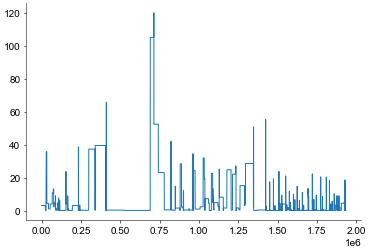

In [8]:
plt.plot(dataset_dict["ISIs"][:, 12, -1].T)
plt.show()

In [9]:
dataset_dict["ISIs"].shape

(1934127, 35, 4)